정형데이터 실습

* 회귀모형
    * 선형 회귀모형

* 분류모형
    * SVM
    * KNN
    

---

1. 선형 회귀모형

In [19]:
# !pip install scikit-learn
# !pip install matplotlib

In [1]:
# scikit-learn을 설치합니다 (설치되어 있지 않은 경우)
# !pip install scikit-learn

import numpy as np
from sklearn.linear_model import LinearRegression

# 예제 데이터 생성
# 아래는 간단한 예제 데이터로 설명하기 위한 것이며, 실제 데이터를 사용하려면 데이터를 불러오세요.
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # 입력 변수 (독립 변수)
y = np.array([2, 4, 5, 4, 5])  # 타겟 변수 (종속 변수)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련 (데이터에 적합)
model.fit(X, y)

# 훈련된 모델을 사용하여 예측
# 예측을 위한 새로운 데이터 (예: X_new)를 입력하여 y_pred 값을 얻을 수 있습니다.
# y_pred = model.predict(X_new)


LinearRegression()

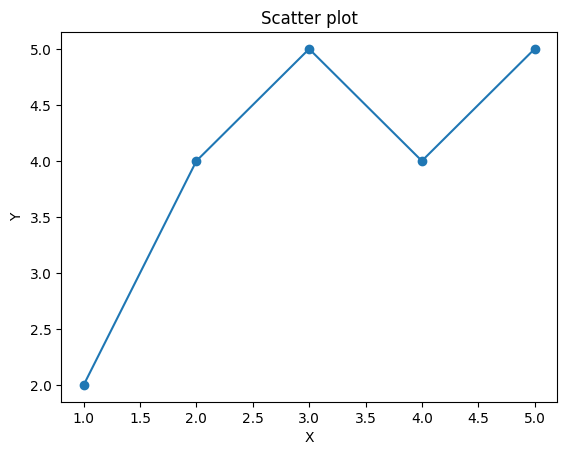

In [2]:
# 필요한 라이브러리를 불러옵니다 (설치되어 있지 않은 경우 먼저 설치해야 합니다).
# !pip install matplotlib

import matplotlib.pyplot as plt

# 그래프 그리기
plt.plot(X, y)

# x축과 y축 레이블 추가
plt.xlabel('X')
plt.ylabel('Y')

# 그래프 제목 추가
plt.title('Scatter plot')

# point 추가
plt.scatter(X, y) # 데이터 포인트 그리기

# 그래프 표시
plt.show()

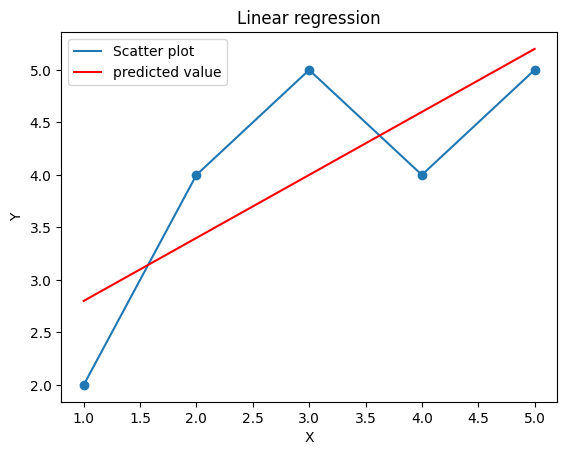

In [3]:
# 그래프 그리기
plt.plot(X, y, label='Scatter plot')  # 데이터 포인트 그리기
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', label='predicted value')  # 선형 회귀 예측 그래프 그리기 (빨간색)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear regression')
plt.legend()
plt.show()

2. KNN

array([2.8, 4. , 5.2, 6.4, 7.6])